## _*LiH dissociation curve using ExactEigensolver*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy and dipole moments of a Lithium Hydride (LiH) molecule over a range of inter-atomic distances.

This notebook populates a dictionary, which is a progammatic representation of an input file, in order to drive the qiskit_chemistry stack. Such a dictionary can be manipulated programmatically and this is indeed the case here where we alter the molecule supplied to the driver in each loop.
    
This notebook has been written to use the PYSCF chemistry driver. See the PYSCF chemistry driver readme if you need to install the external PySCF library that this driver requires.
 

In [1]:
import numpy as np
import pylab
from qiskit_chemistry import QiskitChemistry

In [2]:
# Input dictionary to configure Qiskit Chemistry for the chemistry problem.
# Note: In order to allow this to run reasonably quickly it takes advantage
#       of the ability to freeze core orbitals and remove unoccupied virtual
#       orbitals to reduce the size of the problem. The result without this
#       will be more accurate but it takes rather longer to run.

# qiskit_chemistry_dict_eigen uses classical approach to produce the reference ground state energy.
qiskit_chemistry_dict_eigen = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'algorithm': {'name': 'ExactEigensolver'},
    'operator': {'name':'hamiltonian','freeze_core': True, 'orbital_reduction': [-3, -2], 'qubit_mapping': 'parity', 'two_qubit_reduction': True},
}

# qiskit_chemistry_dict_vqe uses quantum approach to evaluate the ground state energy.
qiskit_chemistry_dict_vqe = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'algorithm': {'name': 'VQE', 'operator_mode': 'matrix'},
    'operator': {'name':'hamiltonian','freeze_core': True, 'orbital_reduction': [-3, -2], 'qubit_mapping': 'parity', 'two_qubit_reduction': True},
    'optimizer': {'name': 'COBYLA', 'maxiter': 20000},
    'variational_form': {'name': 'RYRZ', 'depth': 10},
    'backend': {'name': 'statevector_simulator'}
}

# tested molecular, LiH
molecule = 'Li .0 .0 -{0}; H .0 .0 {0}'

In [3]:
# choose one of configurations above for experiments
qiskit_chemistry_dict = qiskit_chemistry_dict_eigen

In [4]:
# configure distance between two atoms
pts  = [x * 0.1  for x in range(6, 20)]
pts += [x * 0.25 for x in range(8, 16)]
pts += [4.0]
distances   = np.empty(len(pts))
hf_energies = np.empty(len(pts))
energies    = np.empty(len(pts))
dipoles     = np.empty(len(pts))

print('Processing step __', end='')
for i, d in enumerate(pts):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    qiskit_chemistry_dict['PYSCF']['atom'] = molecule.format(d/2) 
    solver = QiskitChemistry()
    result = solver.run(qiskit_chemistry_dict)
    distances[i] = d
    hf_energies[i] = result['hf_energy']
    energies[i] = result['energy']
    dipoles[i]  = result['total_dipole_moment'] / 0.393430307
print(' --- complete')

print('Distances: ', distances)
print('HF Energies:', hf_energies)
print('Energies:', energies)
print('Dipole moments:', dipoles)

Processing step 22 --- complete
Distances:  [0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.  ]
HF Energies: [-7.29954105 -7.48594487 -7.61577016 -7.70575334 -7.76736214 -7.80874318
 -7.83561583 -7.85195386 -7.86053866 -7.86335762 -7.86186477 -7.85714496
 -7.8500187  -7.84111204 -7.83090558 -7.80193896 -7.77087367 -7.74000074
 -7.7108299  -7.68437642 -7.6612016  -7.64145387 -7.62497563]
Energies: [-7.31334583 -7.50092209 -7.63097825 -7.72081241 -7.7822424  -7.82359928
 -7.85069838 -7.86756329 -7.87700149 -7.88101572 -7.88107204 -7.87826817
 -7.87344029 -7.86723396 -7.86015321 -7.84104271 -7.82307664 -7.8086124
 -7.79836343 -7.79175325 -7.78771697 -7.78531972 -7.78391847]
Dipole moments: [5.3479565  5.05436846 4.89154649 4.80824206 4.76423166 4.73775921
 4.71893511 4.70394304 4.69125691 4.67959192 4.66694467 4.65022445
 4.62517401 4.5864183  4.52758314 4.24518851 3.69244462 2.8795465
 1.99991673 1.27228084 0.76878114 0.451

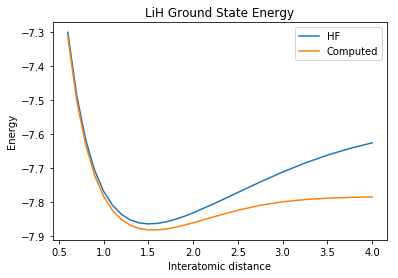

In [5]:
pylab.plot(distances, hf_energies, label='HF')
pylab.plot(distances, energies, label='Computed')
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy')
pylab.legend(loc='upper right')

Text(0.5,1,'LiH Dipole Moment')

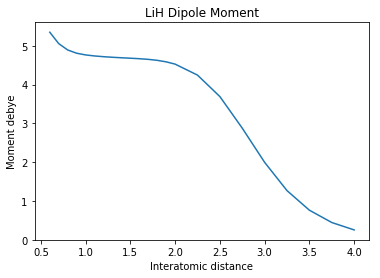

In [6]:
pylab.plot(distances, dipoles)
pylab.xlabel('Interatomic distance')
pylab.ylabel('Moment debye')
pylab.title('LiH Dipole Moment')